In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Fri May  3 06:31:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

In [ ]:
#!unzip "PATH/TO/YOUR/ZIP/FILE" -d "datasets"

!unzip "datasets/KiriJaeja.v2i.yolov8.zip" -d "datasets"

Archive:  datasets/KiriJaeja.v2i.yolov8.zip
 extracting: datasets/README.dataset.txt  
 extracting: datasets/README.roboflow.txt  
 extracting: datasets/data.yaml      
   creating: datasets/test/
   creating: datasets/test/images/
 extracting: datasets/test/images/-2024-04-16-144125_png.rf.be4f3f88808d17945335533b6363c879.jpg  
 extracting: datasets/test/images/-2024-04-16-145332_png.rf.34cc0b30567f18343071a96f521089d2.jpg  
 extracting: datasets/test/images/-2024-04-18-001621_png.rf.5219b5c54f90fb7734a3c9eac838597f.jpg  
 extracting: datasets/test/images/-2024-04-18-001857_png.rf.390a0a34d8d024bf288fa89c9882ca33.jpg  
 extracting: datasets/test/images/-2024-04-18-001918_png.rf.9a1ea8272f87044d912a780cbbf19a3f.jpg  
 extracting: datasets/test/images/-2024-04-18-002036_png.rf.6fdf1105fcf46e43e8dd2ddceddb971f.jpg  
 extracting: datasets/test/images/-2024-04-18-003129_png.rf.b19671797bbf1d90ccfdbe511109b3a6.jpg  
 extracting: datasets/test/images/-2024-04-18-003153_png.rf.7e93c9aca2481f6

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data='{DATA_DIR}/data.yaml' epochs=10 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data={DATA_DIR}/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, wor

In [9]:
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train3/confusion_matrix.png'

In [10]:
Image(filename=f'{HOME}/runs/detect/train3/results.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train3/results.png'

In [11]:
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg')


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train3/val_batch0_pred.jpg'

In [ ]:
!yolo task=detect mode=val model='{HOME}/runs/detect/train3/weights/best.pt' data='{DATA_DIR}/data.yaml'

2024-05-03 05:04:13.520911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 05:04:13.520977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 05:04:13.522329: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 05:04:14.627256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 113 images, 0 backg

In [12]:
!yolo task=detect mode=predict model='{HOME}/runs/detect/train3/weights/best.pt' conf=0.25 source='{DATA_DIR}/test/images' save=true

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 243, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 62, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 92, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 389, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 336, in torch_safe_load
    return torch.load(file, map_location='cpu')  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 998, in load
    with _open_file_lik

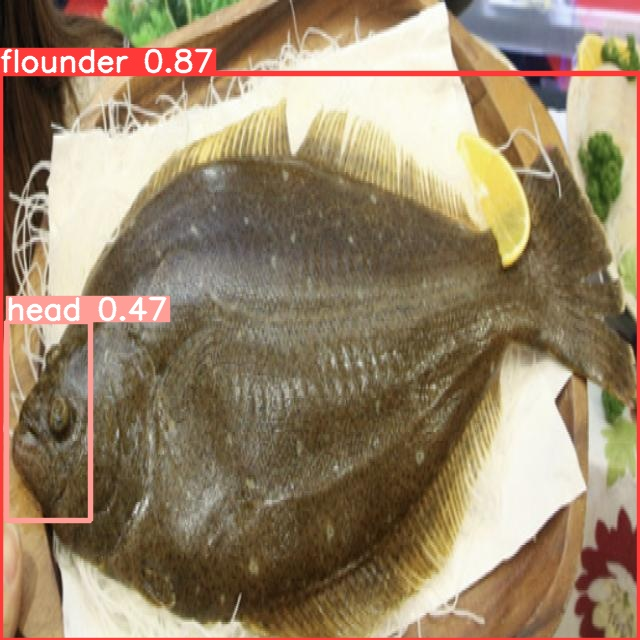

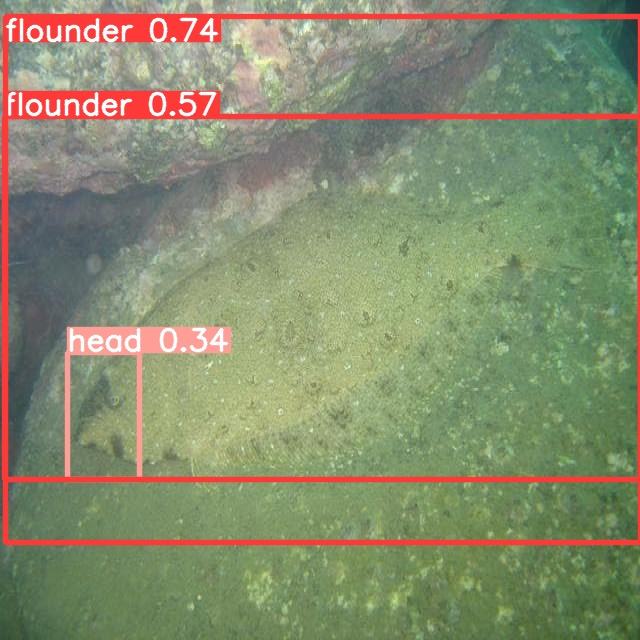

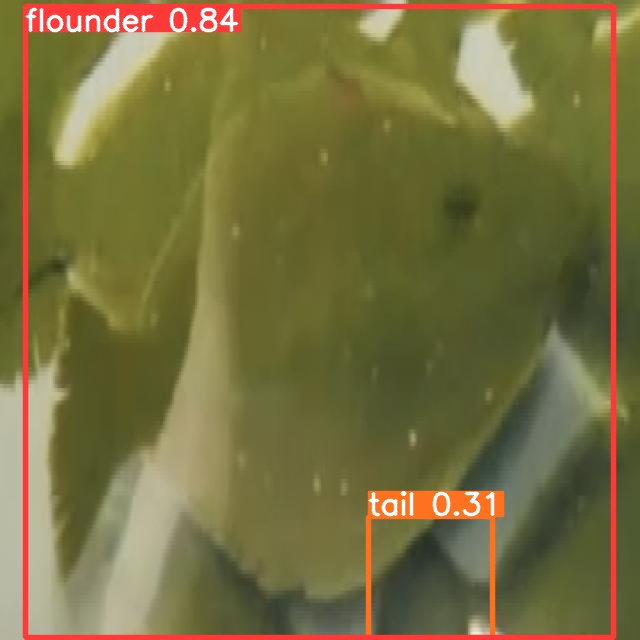

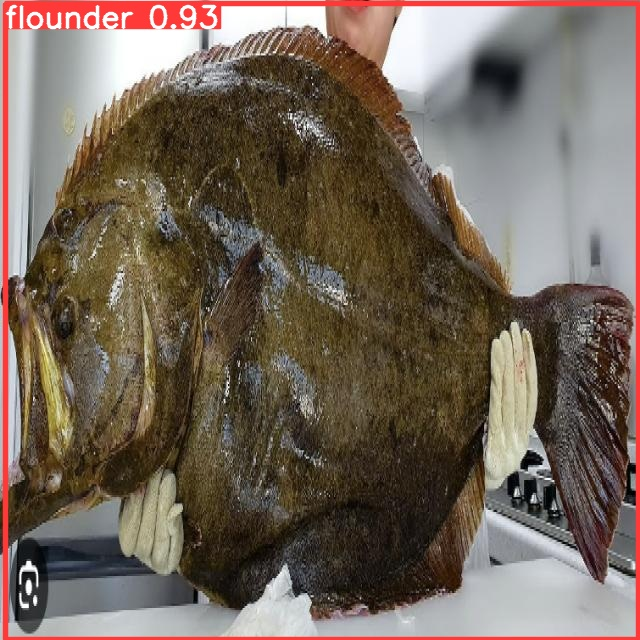

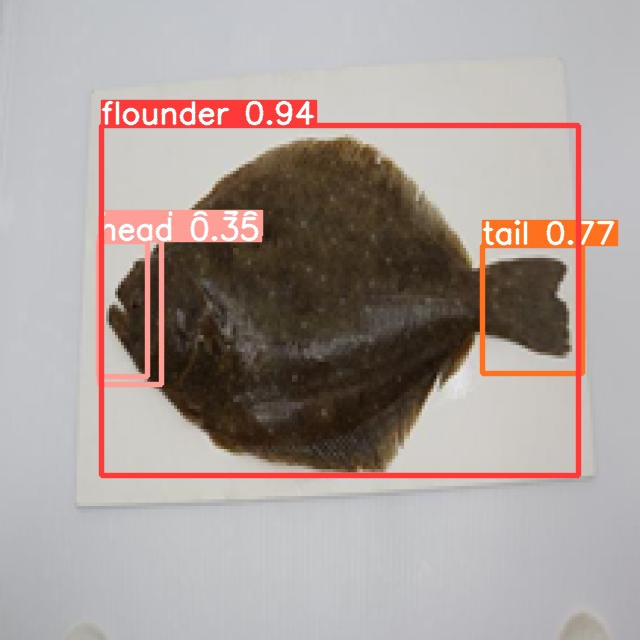

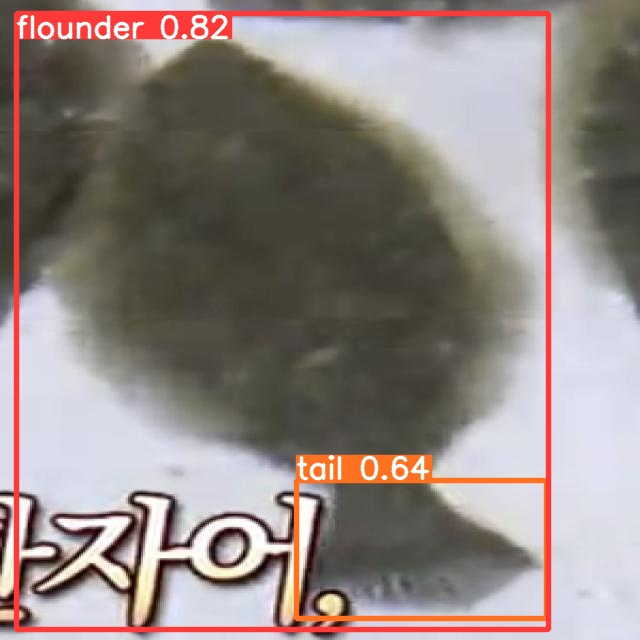

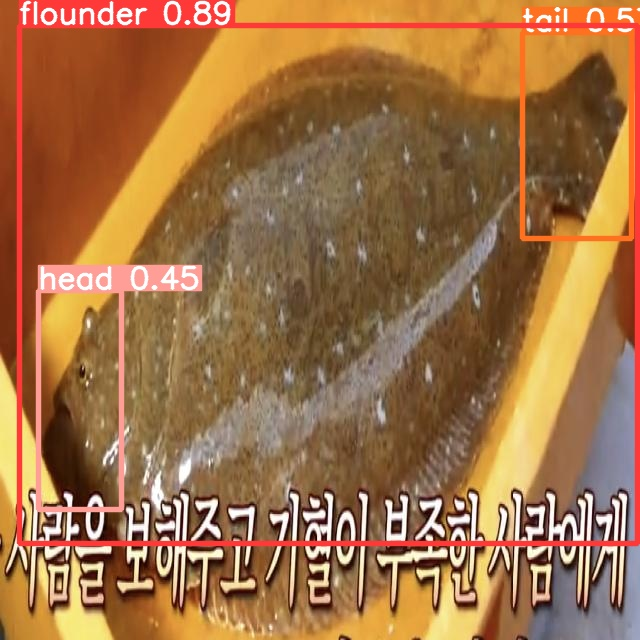

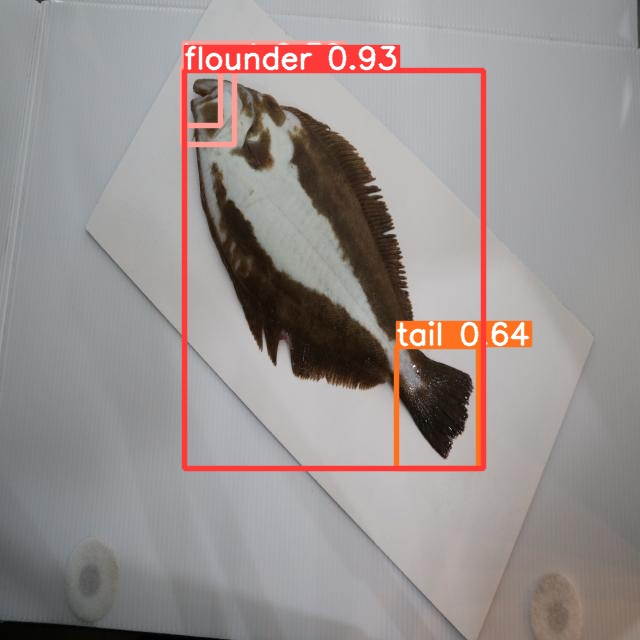

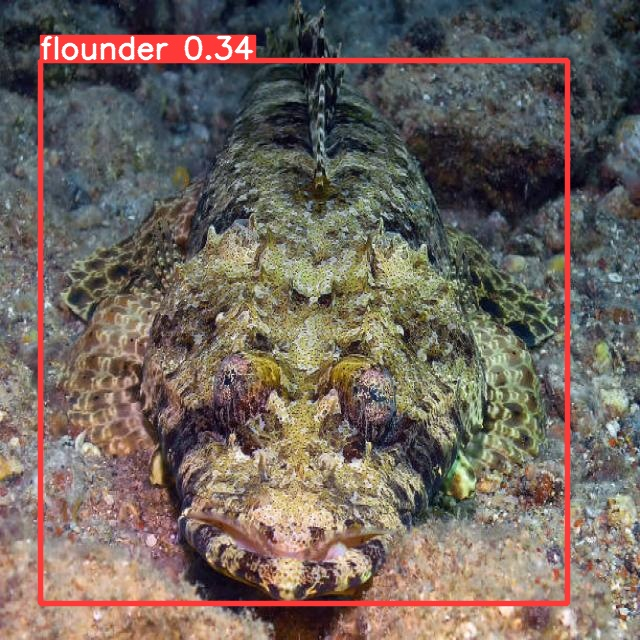

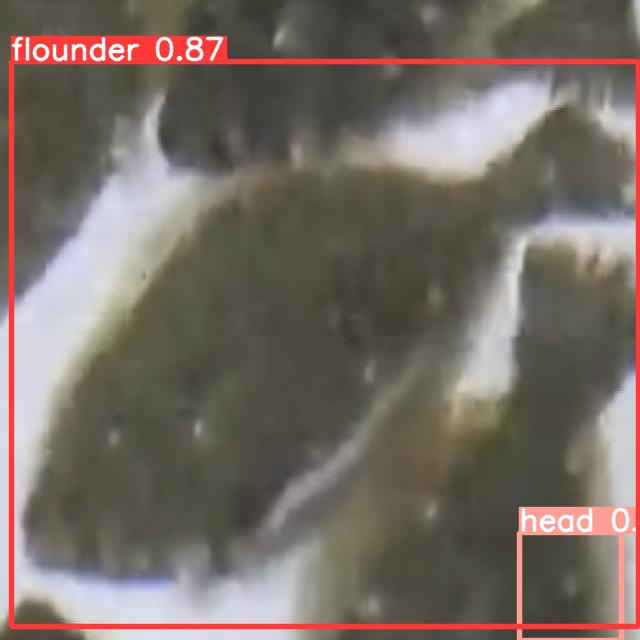

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!yolo export model=/content/runs/detect/train3/weights/best.pt format=onnx

2024-05-03 05:07:19.151613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 05:07:19.151680: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 05:07:19.152926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 05:07:20.300705: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from /content/runs/detect/train3/weights/best.pt with input shape (1, 3, 640, 